# Problem Statement

This analysis and prediction about total deaths of covid in states of India.Govertment and public are in confusion of when this will end.As many people are jobless and have lost important ones to them. Hence,by predicting number of deaths and new cases (through visualisation) that could arise/decrease/stay same in future, they can be prepared.
The approach taken: Since predicting 'Deaths' is a regression problem, we will be using decision tree regressor as our model.

# Data
The data has 1 file: covid_19_states_india.csv

It contain the following 8 columns(7 features and 1 target)

- State/UTs - Names of Indian States and Union Territories.
- Total Cases - Total number of confirmed cases
- Active - Total number of active cases
- Discharged - Total number of discharged cases
- Deaths - Total number of deaths
- Active Ratio (%) - Ratio of number of active cases to total cases
- Discharge Ratio (%) - Ratio of number of discharged cases to total cases
- Death Ratio (%) - Ratio of number of deaths to total cases)


#  Hypothesis Generation 
All the factors that influence the potential outcome('Death') 
- 1.The higher the active cases, the higher the 'deaths' 
- 2.The higher the 'Total Cases', the
higher the number'Deaths'.
- 3.The higher the'discharge ratio',the lesser the 'Deaths'.

#  Setting up by importing libraries,reading data & knowing the size of data

Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


Loading(Reading) the data

In [ ]:
train = pd.read_csv("../input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv")
train.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7549,1,7419,129,0.01,98.28,1.71
1,Andhra Pradesh,1995669,16341,1965657,13671,0.82,98.50,0.69
2,Arunachal Pradesh,51655,1763,49640,252,3.41,96.10,0.49
3,Assam,581398,8772,567113,5513,1.51,97.54,0.95
4,Bihar,725518,204,715665,9649,0.03,98.64,1.33


In [ ]:
train.shape

(36, 8)

# Understanding the data by knowing the variables types, data types, statistics of the data & null,NAN values.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [ ]:
train.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,8.968294e+05,10205.972222,8.746090e+05,12014.416667,1.682222,97.052222,1.265000
std,1.303563e+06,30660.005408,1.262310e+06,23205.834381,3.335660,3.239175,0.564464
min,7.549000e+03,1.000000,7.419000e+03,4.000000,0.010000,81.440000,0.040000
25%,6.981775e+04,213.750000,6.598125e+04,803.750000,0.067500,97.150000,0.947500
50%,4.645165e+05,1062.500000,4.546995e+05,5322.500000,0.570000,98.200000,1.320000
75%,9.980822e+05,7369.500000,9.826742e+05,13579.500000,1.337500,98.597500,1.607500
max,6.401213e+06,175695.000000,6.201168e+06,135255.000000,18.190000,99.920000,2.720000


In [ ]:
train.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

##  Insights

   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
 
 - 1.No null values
 - 2.1 non numerical value('State/UTs')
 - 3.36 values in total
 

# Exploring the target variable & features with visualisations

In [ ]:
train


,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7549,1,7419,129,0.01,98.28,1.71
1,Andhra Pradesh,1995669,16341,1965657,13671,0.82,98.50,0.69
2,Arunachal Pradesh,51655,1763,49640,252,3.41,96.10,0.49
3,Assam,581398,8772,567113,5513,1.51,97.54,0.95
4,Bihar,725518,204,715665,9649,0.03,98.64,1.33
5,Chandigarh,62035,42,61182,811,0.07,98.62,1.31
6,Chhattisgarh,1003870,1037,989284,13549,0.10,98.55,1.35
7,Dadra and Nagar Haveli and Daman and Diu,10657,4,10649,4,0.04,99.92,0.04
8,Delhi,1437156,471,1411612,25073,0.03,98.22,1.74
9,Goa,172683,884,168622,3177,0.51,97.65,1.84


In [ ]:
train.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio (%)', 'Discharge Ratio (%)', 'Death Ratio (%)'],
      dtype='object')

<AxesSubplot:xlabel='Active', ylabel='Deaths'>

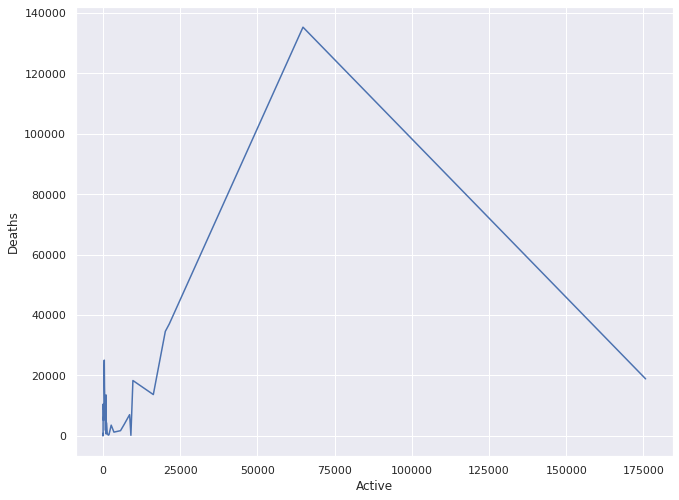

In [ ]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.lineplot(x=train['Active'],y=train['Deaths'])


<AxesSubplot:xlabel='Deaths', ylabel='Total Cases'>

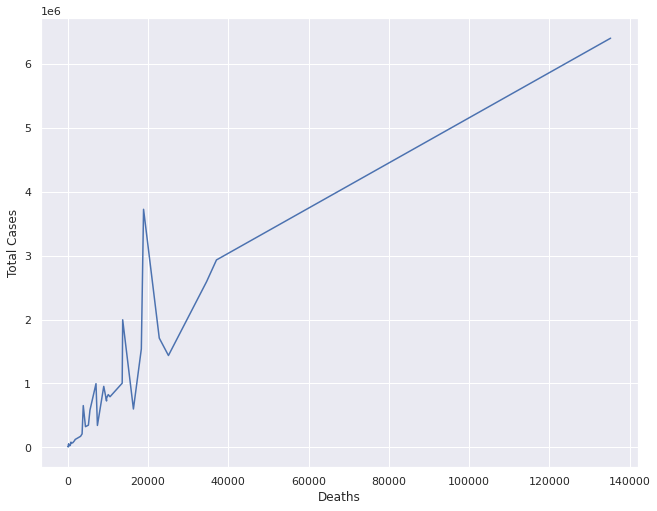

In [ ]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.lineplot(y=train['Total Cases'],x=train['Deaths'])


<AxesSubplot:xlabel='Total Cases', ylabel='Deaths'>

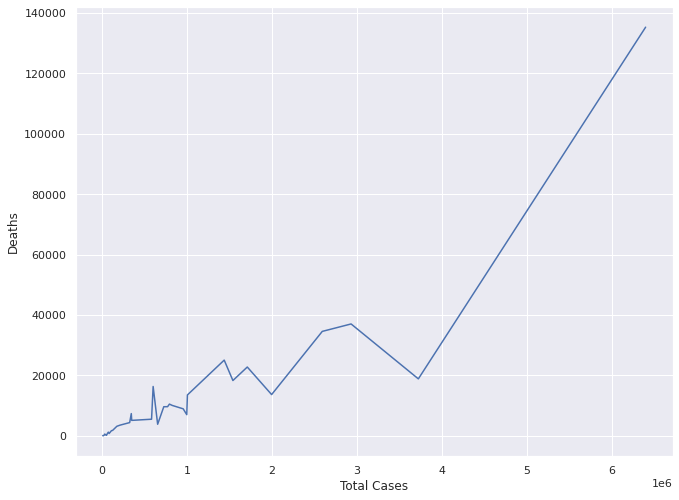

In [ ]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.lineplot(y=train['Deaths'],x=train['Total Cases'])


<AxesSubplot:xlabel='Death Ratio (%)', ylabel='State/UTs'>

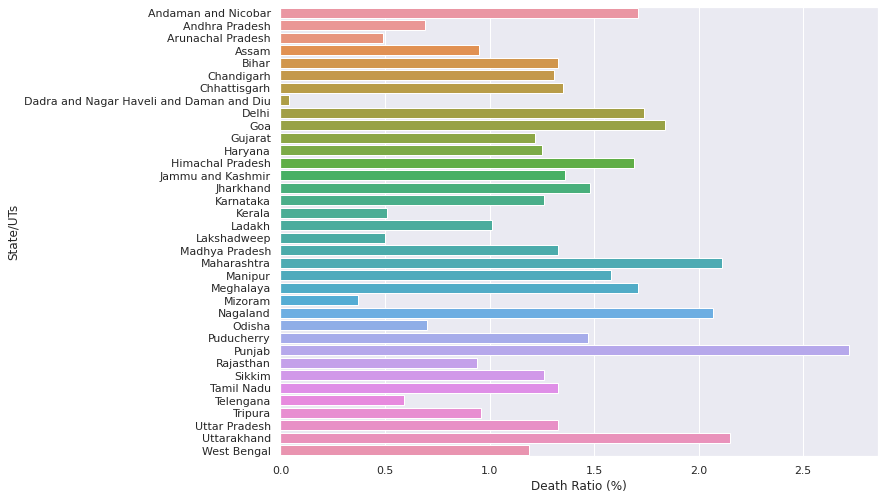

In [ ]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.barplot(x=train['Death Ratio (%)'],y=train['State/UTs'])



# Transforming non-numerical values with encoding.

In [ ]:
from sklearn import preprocessing
le_ms=preprocessing.LabelEncoder()
train['State/UTs']=le_ms.fit_transform(train['State/UTs'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     int64  
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 2.4 KB


# Model Splitting

In [ ]:
X=train.drop(["Deaths"], axis=1)
Y=train['Deaths']
print(X.shape)
print(Y.shape)


(36, 7)
(36,)


In [ ]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=1)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(25, 7)
(11, 7)
(25,)
(11,)


#  Fitting the model, predicting and printing the MAE

In [ ]:
model = DecisionTreeRegressor().fit(train_x,train_y)
y_pred=model.predict(test_x)

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(test_y,y_pred))

2930.818181818182


In [ ]:
y_pred

array([22786.,  5132.,  7021.,  3557.,  9661.,   129.,  1240.,   607.,
         607.,   782.,  5132.])

In [ ]:
print(y_pred.mean())
y_pred_perc = y_pred.mean()


5150.363636363636


In [ ]:
print(test_y.mean())
y_test_perc = test_y.mean()

7960.090909090909


In [ ]:
off_percentage = 100-(y_pred_perc/y_test_perc)*100
print(off_percentage)

35.29767819006179


The prediction of deaths of Covid-19 based on the variables in this data is off by ~ 35 %.